In [106]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import f1_score
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline

import Builder



In [107]:
def cutOff(data, value):
    """

    :param data:
    :param value:
    :return:
    """
    # calc best f1-score = value
    cutoff_returns = np.zeros(len(data))
    for item in range(len(data)):
        if abs(data[item]) > value:
            cutoff_returns[item] = -1
        else:
            cutoff_returns[item] = 1
    return cutoff_returns

def bestF1Score(data, jumps):
    """

    :param data: array with one of the data features
    :param jumps: array of the merton jumps, ytrue
    :return: best F1-Score for the cutoff method
    """
    """
    jumps = [0,0,0,1,0,1,0]
    data  = [0,1,0,1,0,1,0]
    starte als value für Cutoff bei dem betrag höchsten wert, laufe bis 0,
    irgendwo dazwischen ist der Cutoff der den besten CutOff wert gibt,
    nehme den besten CutOff als finalen wert
    """
    start = max(abs(data))
    n = 1000
    steps = np.linspace(start=start, stop=0, num=n)
    bestF1 = 0
    bestCutOff = 0

    for step in steps:
        if f1_score(y_true=jumps, y_pred=cutOff(data, step), average=None) > bestF1:
            bestCutOff = step

    return bestCutOff

In [108]:
data = Builder.buildMertonDF()
data

0.008


,Merton Jump,Jumps plot,Jumps,Return pct,Return log,RV,BPV,Diff,Anomaly Returns IF,Anomaly RV IF,Anomaly Diff IF
1,1.013529,0.0,1,0.004429,0.004419,0.000020,0.000091,-0.000071,1,1,1
2,1.000371,0.0,1,-0.012982,-0.013067,0.000171,0.000073,0.000098,1,1,1
3,0.996809,0.0,1,-0.003561,-0.003567,0.000013,0.000028,-0.000015,1,1,1
4,0.991850,0.0,1,-0.004975,-0.004987,0.000025,0.000026,-0.000001,1,1,1
5,0.995174,0.0,1,0.003351,0.003345,0.000011,0.000018,-0.000006,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
994,1.238641,0.0,1,0.006746,0.006724,0.000045,0.000121,-0.000075,1,1,1
995,1.224587,0.0,1,-0.011347,-0.011412,0.000130,0.000081,0.000049,1,1,1
996,1.230154,0.0,1,0.004546,0.004536,0.000021,0.000034,-0.000014,1,1,1
997,1.236052,0.0,1,0.004795,0.004783,0.000023,0.000101,-0.000078,1,1,1


In [109]:
def cutOff(data,jumps):
    start = max(abs(data))
    n = 100
    steps = np.linspace(start=start, stop=0, num=n)
    bestF1 = 0
    bestCutOff = 0

    df_neu = pd.DataFrame()
    df_neu['Cutoff Jump'] = data
    data_list = df_neu['Cutoff Jump'].values

    for step in steps:
        cutoff_jump = [-1 if i>step or i<(step*-1) else 1 for i in data_list]
        df_neu['Cutoff Jump'] = cutoff_jump
        f1 = f1_score(jumps,df_neu['Cutoff Jump'], pos_label=-1)

        if f1 > bestF1:
            bestF1 = f1
            bestCutOff = step

    return bestCutOff,bestF1



cut,bestF1 = cutOff(data['Return log'],data['Jumps'])

bestF1

0.7499999999999999

<AxesSubplot:ylabel='Return log'>

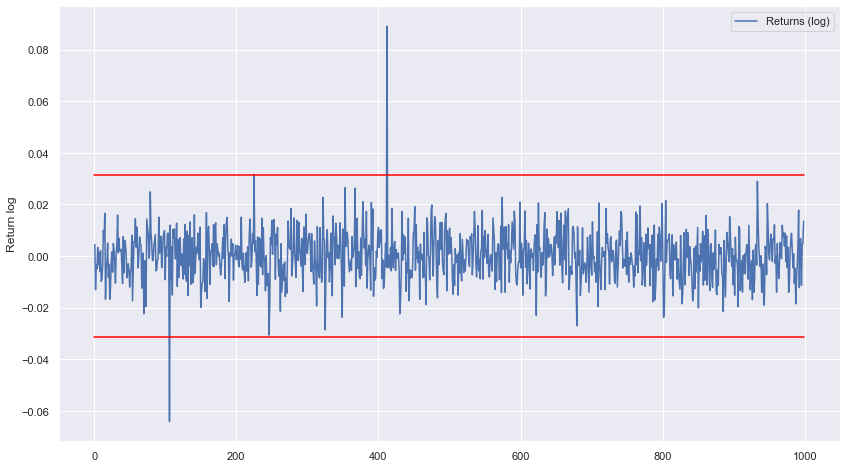

In [110]:
plt.figure(figsize=(14,8))
sns.lineplot(data=data['Return log'],legend='auto',label='Returns (log)')

c = [cut for i in range(1000)]
c_min = [cut*(-1) for i in range(1000)]
cut_df = pd.DataFrame(c,columns=['Cut'])
cut_min_df = pd.DataFrame(c_min,columns=['Cut'])

sns.lineplot(data=cut_df['Cut'],color='red')
sns.lineplot(data=cut_min_df['Cut'],color='red')
plt.show()